In [1]:
import pdb
import sys
import argparse
import itertools

import numpy as np
from scipy.stats import norm

sys.path.insert(0, '../network')
from transfer_functions import LIF, ReLU

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import plot_utils as pu
import color_scheme as cs

In [2]:
datapath2 = "7-spiking/data/fast.npy"
datapath3 = "7-spiking/data/slow.npy"

**Panels a, b**: Rate network

**Panel c**: Spiking network

In [27]:
def plot_spiking_panel(datapath, axes, ylabels, title, neuron_idxs):

    [correlations,
     v_exc, rate_exc, spks_exc,
     v_inh, rate_inh, spks_inh,
     exc_thresh] = np.load(open(datapath, "rb"), allow_pickle=True)

    tick_fontsize = 5
    label_fontsize = 5

    # Plot correlations
    cmap = matplotlib.cm.get_cmap("bone")
    colors = [cmap(x) for x in np.linspace(0.1,0.7,correlations.shape[0])[::1]]
    for correlation, c in zip(correlations, colors):
        axes[0].plot(correlation, c=c, linewidth=0.5)
    axes[0].set_ylim([-0.05,0.8])
    axes[0].set_yticks([0,0.4,0.8])
    axes[0].set_yticklabels([0,0.4,0.8])
    
    # Plot excitatory voltages
    for i, c in zip(neuron_idxs, exc_colors):
        axes[1].plot(
            np.arange(v_exc[i].size),
            v_exc[i]-70,
            c=c,
            alpha=1.0,
            linewidth=0.25)
        axes[1].vlines(
            spks_exc[i].nonzero()[-1],
            ymin=exc_thresh-70,
            ymax=0,
            linewidth=0.25,
            color=c)
    axes[1].set_yticks([-70,0])
    axes[1].set_yticklabels([-70,0])
    
    # Plot excitatory raster (sorted)
    times = np.asarray([np.argmax(r[:]) for r in rate_exc])
    idxs = np.arange(times.size)[np.argsort(times)]
    active_mask = [np.any(r[:] > 0.0) for r in rate_exc[idxs]]
    active_idxs = idxs[active_mask]
    x, y = np.nonzero(spks_exc[active_idxs,:].T[:,::200])
    axes[2].scatter(
        x,
        y,
        s=0.5,
        c="indianred",
        marker='|',
        rasterized=True)
    
    # Plot inhibitory raster
    x, y = np.nonzero(spks_inh.T[:,::50])
    axes[3].scatter(
        x,
        y,
        s=0.5,
        c="royalblue",
        marker='|',
        rasterized=True)
    
    # x-axis
    for ax in axes:
        ax.set_xlim([0,2000])
    for ax in axes[:-1]:
        ax.set_xticks([])
        ax.set_xticks([])
    axes[-1].set_xticks([0, 500, 1000, 1500, 2000])
    axes[-1].set_xticklabels([0, 0.5, 1, 1.5, 2], fontsize=label_fontsize)
    axes[-1].set_xlabel("Time (s)", fontsize=label_fontsize)
    
    # y-axis
    for ax in axes[-2:]:
        ax.set_yticks([])
    for n, text in enumerate(ylabels):
        axes[n].set_ylabel(text, fontsize=label_fontsize) 
    
    # inset and spines
    inset_axes = []
    for ax in axes:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    for axes_group in [axes, inset_axes]:
        for n, ax in enumerate(axes_group):
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()
            ax.tick_params(axis='both', which='major', labelsize=8, width=1.0, length=3, pad=1)
            [i.set_linewidth(1.0) for i in ax.spines.values()]
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(label_fontsize)
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(label_fontsize)

    axes[0].set_title(title, fontsize=6)

Plot

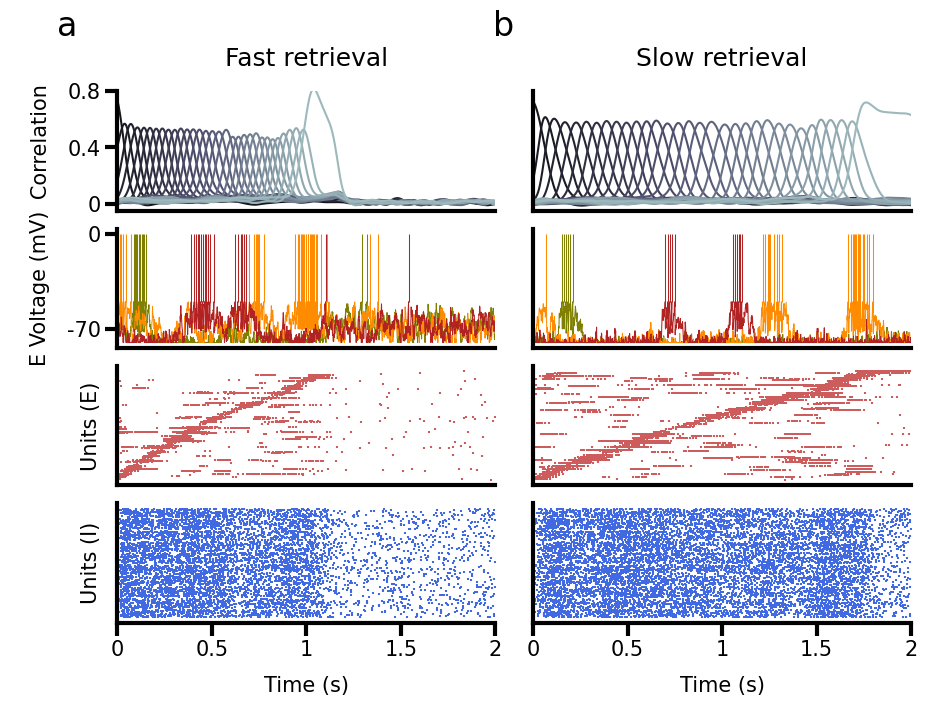

In [33]:
exc_neuron_idxs = [19,23,26]

exc_colors = ['olive', 'darkorange', 'firebrick']
inh_colors = ['mediumblue','royalblue','skyblue','lightsteelblue','deepskyblue']

pu.figure_setup({
  'axes.linewidth': 0.5,
  'lines.linewidth': 0.5,
})
fig_size = pu.get_fig_size(8, 6)
fig = plt.figure(figsize=fig_size, dpi=300)

# Panel b
gs2 = gridspec.GridSpec(4, 1)
gs2.update(left=0.08, right=0.48, top=0.9, bottom=0.15, wspace=0.1, hspace=0.15)
ax5 = plt.subplot(gs2[0, :])
ax6 = plt.subplot(gs2[1, :])
ax7 = plt.subplot(gs2[2, :])
ax8 = plt.subplot(gs2[3, :])
ax5.annotate("a", xy=(0.06,0.95), xycoords='figure fraction', fontsize=8)

# Panel c
gs3 = gridspec.GridSpec(4, 1)
gs3.update(left=0.52, right=0.92, top=0.9, bottom=0.15, wspace=0.1, hspace=0.15)
ax9 = plt.subplot(gs3[0, :])
ax10 = plt.subplot(gs3[1, :])
ax11 = plt.subplot(gs3[2, :])
ax12 = plt.subplot(gs3[3, :])
ax9.annotate("b", xy=(0.52,0.95), xycoords='figure fraction', fontsize=8)

plot_spiking_panel(datapath2, 
        [ax5, ax6, ax7, ax8],
        ylabels=["   Correlation", "E Voltage (mV)", "Units (E)", "Units (I)"],
        title="Fast retrieval",
        neuron_idxs=exc_neuron_idxs)
plot_spiking_panel(datapath3, 
        [ax9, ax10, ax11, ax12],
        ylabels=[],
        title="Slow retrieval",
        neuron_idxs=exc_neuron_idxs)

ax9.set_yticks([])
ax10.set_yticks([])

plt.savefig("7.pdf", dpi=300, bbox_inches='tight')